In [20]:
import sys
!{sys.executable} -m pip install textblob


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 636.8/636.8 kB 7.1 MB/s eta 0:00:0000:0100:01


In [81]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import config
import psycopg2
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import re as re
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize.api import TokenizerI
from sklearn import model_selection


In [82]:
hostname = config.hostname
dbname = config.dbname
uname = config.uname
pwd = config.pwd

engine = create_engine("postgresql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd), pool_size=20, max_overflow=0)

In [83]:
tweets = pd.read_sql("SELECT * FROM tweets", con=engine)
tweets.shape

(8963, 9)

In [84]:
tweets.tail()

tweet_id            author_id  \
8958  1565391509267968000   921231963121262594   
8959  1565391500803981317  1551943441763942405   
8960  1565391499109474304  1260395857247174656   
8961  1565391463667879936  1333549950299373568   
8962  1565391454251454465            488162370   

                                             tweet_text  like_count  \
8958  RT @SOTSPodcast: Pumpkin Spice lattes and Pier...           0   
8959  Get my art printed on awesome products. Suppor...           0   
8960  @wendigochild13 Lol I have pumpkin spice coffe...           1   
8961  @Jenofthemidwest I know there‚Äôs a creme frap o...           1   
8962  RT @LizShuler: OMG! Starbucks‚Äô pumpkin spice l...           0   

      quote_count  reply_count  retweet_count place        date  
8958            0            0            684  None  2022-09-01  
8959            0            0              0        2022-09-01  
8960            0            1              0  None  2022-09-01  
8961            0            1              0  None  2022-09-01  
8962            0            0            234        2022-09-01

In [85]:
users = pd.read_sql("SELECT * FROM users", con=engine)
users.shape

(8389, 7)

In [86]:
users.describe()

follower_count  following_count   tweet_count
count    8.389000e+03      8389.000000  8.389000e+03
mean     6.422312e+03      1077.857075  3.543123e+04
std      1.606282e+05      2895.557859  9.332947e+04
min      0.000000e+00         0.000000  1.000000e+00
25%      1.170000e+02       183.000000  2.775000e+03
50%      3.700000e+02       417.000000  1.099700e+04
75%      1.143000e+03       966.000000  3.425000e+04
max      1.401940e+07    101887.000000  3.979533e+06

In [87]:
users['acct_created'] = pd.to_datetime(users['acct_created'])

In [88]:
users.groupby(users.acct_created.dt.year).size()

acct_created
2006      3
2007     55
2008    206
2009    825
2010    462
2011    642
2012    657
2013    516
2014    526
2015    464
2016    430
2017    426
2018    477
2019    525
2020    685
2021    745
2022    745
dtype: int64

In [89]:
tweets['date'] = pd.to_datetime(tweets['date'])
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8963 entries, 0 to 8962
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       8963 non-null   object        
 1   author_id      8963 non-null   object        
 2   tweet_text     8963 non-null   object        
 3   like_count     8963 non-null   int64         
 4   quote_count    8963 non-null   int64         
 5   reply_count    8963 non-null   int64         
 6   retweet_count  8963 non-null   int64         
 7   place          2240 non-null   object        
 8   date           8963 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 630.3+ KB


In [90]:
twit_by_date_size = tweets.groupby('date').size()
twit_by_date_size.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6 entries, 2022-08-27 to 2022-09-01
Series name: None
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


<AxesSubplot:xlabel='date'>

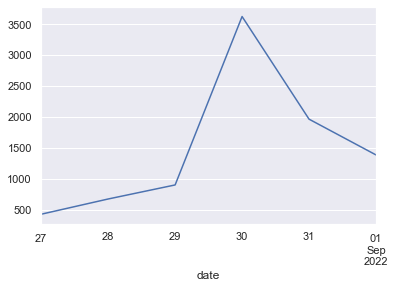

In [91]:
twit_by_date_size.plot()

In [92]:
testdf= tweets.groupby(['date'])['like_count', 'quote_count', 'reply_count', 'retweet_count',].sum()

/var/folders/rw/1rnjc7b90vd_mr3753j04_s40000gp/T/ipykernel_19316/4062091766.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  testdf= tweets.groupby(['date'])['like_count', 'quote_count', 'reply_count', 'retweet_count',].sum()


In [93]:
testdf.reset_index(inplace=True)

In [94]:
testdf.head()

date  like_count  quote_count  reply_count  retweet_count
0 2022-08-27         386            6           64          18381
1 2022-08-28         544           15          124          27484
2 2022-08-29         595           33          162          92319
3 2022-08-30         726           19          199        3277508
4 2022-08-31         498           13          150        1856695

<AxesSubplot:xlabel='date'>

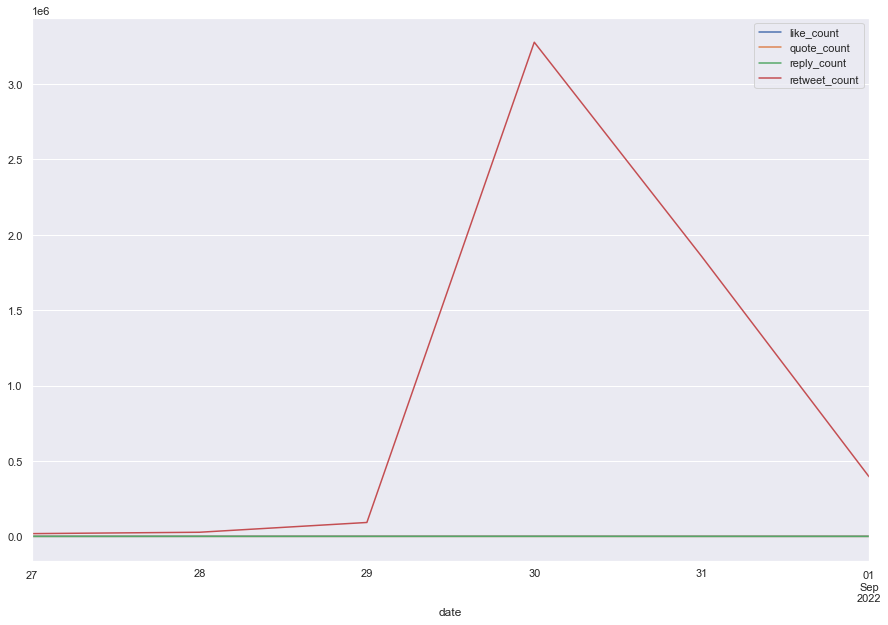

In [95]:
testdf.plot(kind='line', x='date', figsize=(15,10))

In [96]:
print("There are {} different users".format(users['username'].nunique()))

There are 8389 different users


In [97]:
mergedDF = pd.merge(tweets, users, how="left", left_on="author_id", right_on="user_id")

In [98]:
usertweets = mergedDF.groupby('username')

In [99]:
top_users = usertweets.count()['tweet_text'].sort_values(ascending = False)[:25]
top_users_dict = top_users.to_dict()
user_ordered_dict = sorted(top_users_dict.items(), key=lambda x:x[1])
user_ordered_dict = user_ordered_dict[::-1]

dict_values = []
dict_keys = []
for item in user_ordered_dict[0:25]:
    dict_keys.append(item[0])
    dict_values.append(item[1])

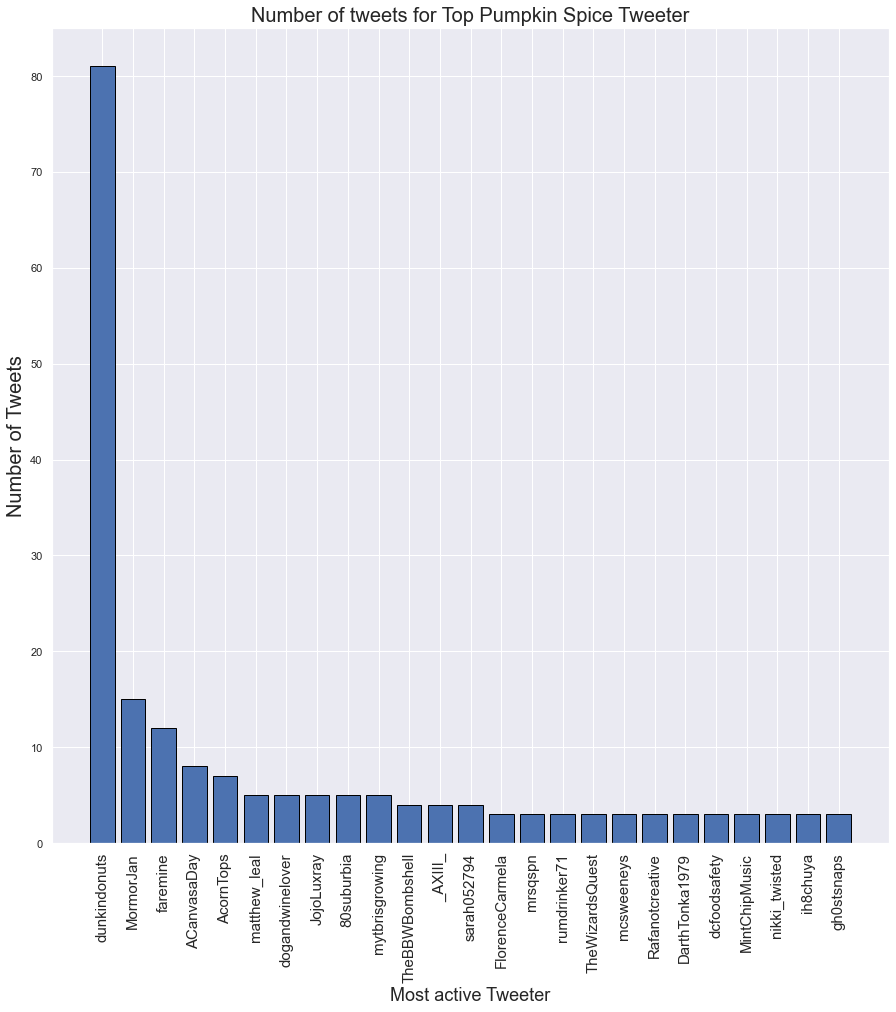

In [100]:
fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Tweeter', fontsize = 18)
plt.ylabel('Number of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Number of tweets for Top Pumpkin Spice Tweeter', fontsize = 20)
plt.show()

In [102]:
tweets['RT'] = tweets['tweet_text'].str.startswith('RT')
#finding retweets

tweet_id            author_id  \
0  1563558331608100864   967075191842099200   
1  1563558255502053376  1269673234552758276   
2  1563558116423188480             94892479   
3  1563558033669509122  1096866679013982210   
4  1563557995677569024   746878617397899264   

                                          tweet_text  like_count  quote_count  \
0  Check out this item in my Etsy shop https://t....           0            0   
1  i need to get a milk frother so i can make my ...           0            0   
2  Having my first pumpkin spice latte this morni...           0            0   
3  @brimorganbooks Yesss! We got pumpkin spice co...           0            0   
4  Got my pumpkin spice iced coffee I‚Äôm ready to ...           0            0   

   reply_count  retweet_count place       date     RT  
0            0              0       2022-08-27  False  
1            0              0  None 2022-08-27  False  
2            0              0  None 2022-08-27  False  
3            0              0  None 2022-08-27  False  
4            0              0  None 2022-08-27  False

In [103]:
#See the percentage of tweets from the initial set that are retweets:
RT_tweets = tweets[tweets['RT'] == True]
print(f"The percentage of retweets is {round(len(RT_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 45% of all the tweets


In [104]:
tweets['Reply'] = tweets['tweet_text'].str.startswith('@')
tweets.head()

tweet_id            author_id  \
0  1563558331608100864   967075191842099200   
1  1563558255502053376  1269673234552758276   
2  1563558116423188480             94892479   
3  1563558033669509122  1096866679013982210   
4  1563557995677569024   746878617397899264   

                                          tweet_text  like_count  quote_count  \
0  Check out this item in my Etsy shop https://t....           0            0   
1  i need to get a milk frother so i can make my ...           0            0   
2  Having my first pumpkin spice latte this morni...           0            0   
3  @brimorganbooks Yesss! We got pumpkin spice co...           0            0   
4  Got my pumpkin spice iced coffee I‚Äôm ready to ...           0            0   

   reply_count  retweet_count place       date     RT  Reply  
0            0              0       2022-08-27  False  False  
1            0              0  None 2022-08-27  False  False  
2            0              0  None 2022-08-27  False  False  
3            0              0  None 2022-08-27  False   True  
4            0              0  None 2022-08-27  False  False

In [105]:
reply_tweets = tweets[tweets['Reply'] == True]
print(f"The percentage of tweet replies is {round(len(reply_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of tweet replies is 15% of all the tweets


In [106]:
mention_tweets = tweets[(tweets['RT']==False) & (tweets['Reply'] == False) & (tweets['tweet_text'].str.contains('@'))]
print(f"The percentage of mentions is {round(len(mention_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of mentions is 3% of all the tweets


In [107]:
plain_text_tweets = tweets[~tweets['tweet_text'].str.contains("@")  & ~tweets['tweet_text'].str.contains("RT")]
print(f"The percentage of retweets is {round(len(plain_text_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 38% of all the tweets


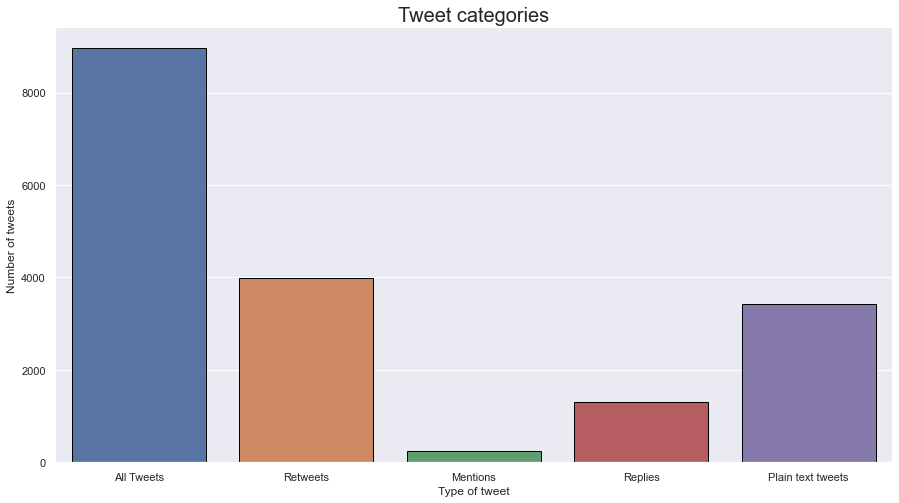

In [108]:
len_list = [ len(tweets), len(RT_tweets),len(mention_tweets), len(reply_tweets), len(plain_text_tweets)]
item_list = ['All Tweets','Retweets', 'Mentions', 'Replies', 'Plain text tweets']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Tweet categories', fontsize = 20)
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)

plt.show()

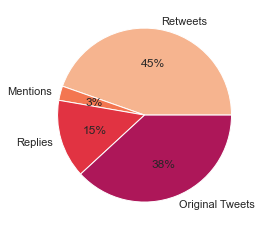

In [109]:
len_data = [len(RT_tweets)/len(tweets),len(mention_tweets)/len(tweets), len(reply_tweets)/len(tweets), len(plain_text_tweets)/len(tweets)]
item_data = ['Retweets', 'Mentions', 'Replies', 'Original Tweets']

# define Seaborn color palette to use
colors = sns.color_palette('rocket_r')[0:4]

#create pie chart
plt.pie(len_data, labels = item_data, colors = colors, autopct='%.0f%%')
plt.show()

In [110]:
#Going to see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweets['tweet_text'].apply(hashtag_pattern.findall))

In [111]:
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [112]:
hashtag_ordered_list = sorted(hashtag_dict.items(), key=lambda x: x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#making list of the most used hashtags and their values

In [113]:
hashtag_ordered_values = []
hashtag_ordered_keys = []

for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])
    
#separating hashtags and values into lists, picking top 20 hashtags to plot

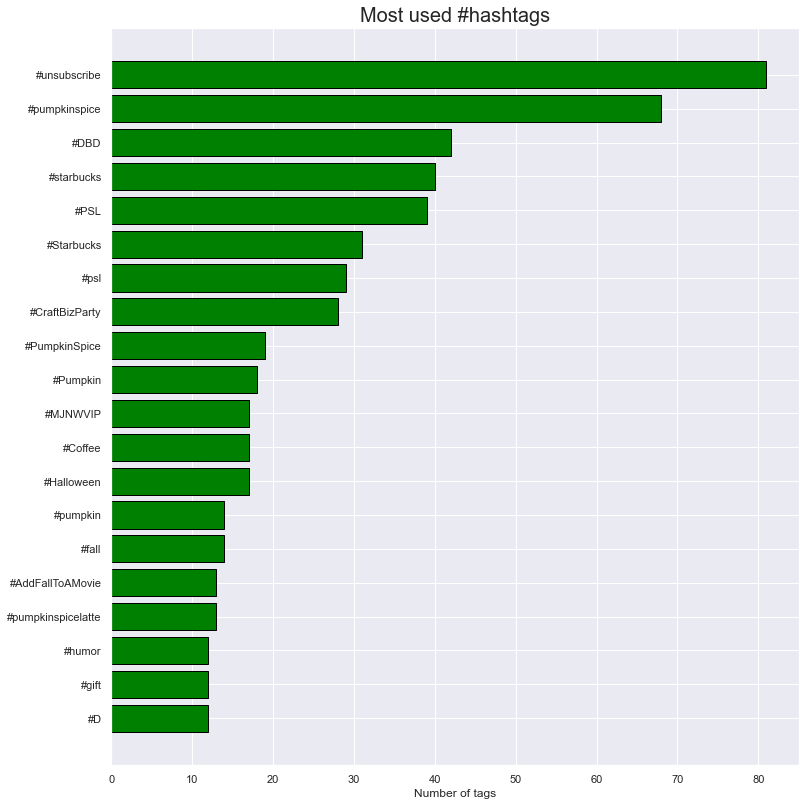

In [114]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos, list(hashtag_ordered_values)[::-1], align='center', color='green', edgecolor='black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Number of tags")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)

plt.show()

#graph with most used hashtags

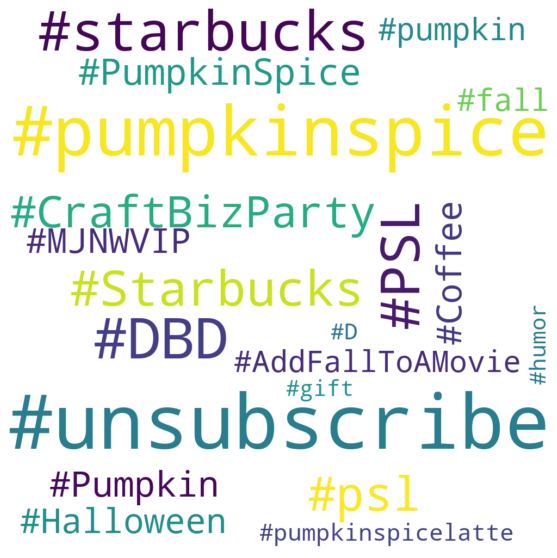

In [115]:
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
    
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

#make wordcloud plot of the most used hashtags.
#use dictionary where the keys are words and the values are the number of appearances

In [116]:
mentions = []
mention_pattern = re.compile(r"@[a-zA-z_]+")
mention_matches = list(tweets['tweet_text'].apply(mention_pattern.findall))


In [117]:
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1
            

In [118]:
mentions_ordered_list = sorted(mentions_dict.items(), key=lambda x: x[1])
mentions_ordered_list = mentions_ordered_list[::-1]

#ordered list with most mentioned users and count of mentions

In [119]:
mentions_ordered_values = []
mentions_ordered_keys = []

for item in mentions_ordered_list[:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])
    
#top 20 mentioned users and values in two lists

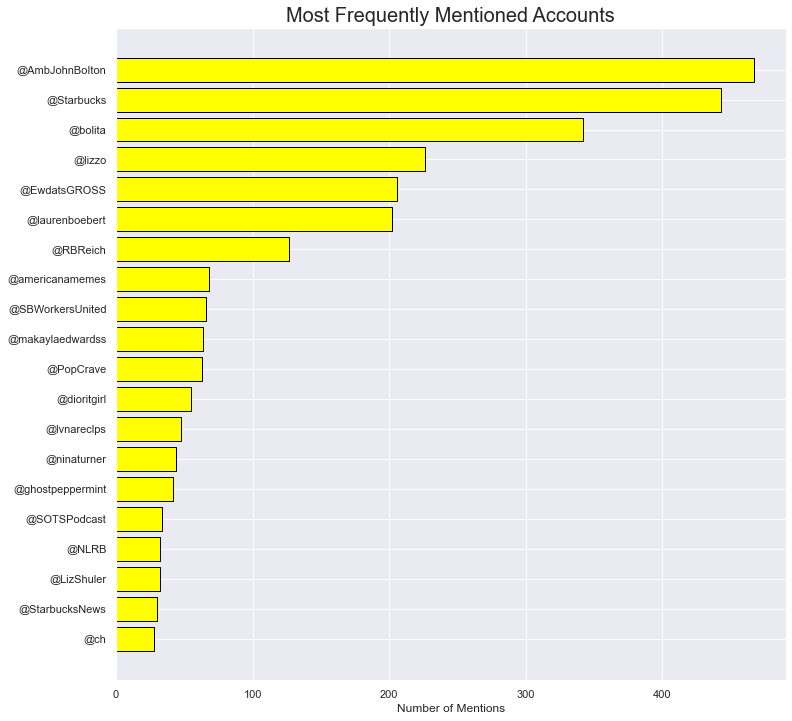

In [120]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos, list(mentions_ordered_values)[::-1], align='center', color='yellow', edgecolor='black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Number of Mentions")
ax.set_title("Most Frequently Mentioned Accounts", fontsize = 20)

plt.show()

#graph of most mentioned accounts

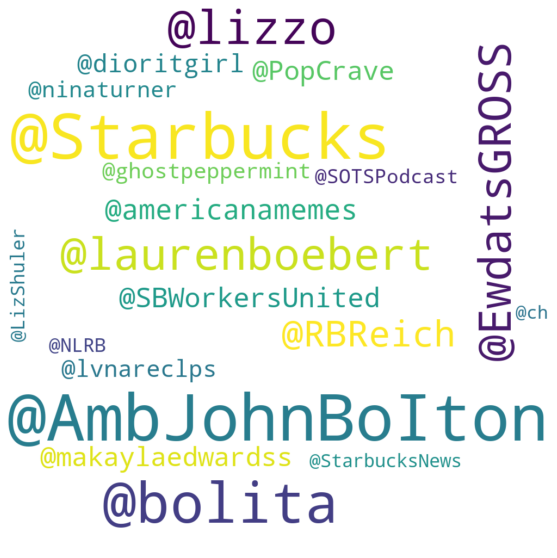

In [121]:
#mentions wordcloud just like replies word cloud

mentions_ordered_dict = {}
for item in mentions_ordered_list[:20]:
    mentions_ordered_dict[item[0]] = item[1]
    
wordcloud = WordCloud(width=1000,height=1000, random_state=21, max_font_size=200,background_color='white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [122]:
# Tweet sentiment Analysis

train, test = model_selection.train_test_split(tweets, test_size=0.3, train_size=0.7, random_state=10)

In [123]:
len(train)

6274

In [124]:
len(test)

2689

In [125]:
# Get stop words to omit from analysis
from nltk.corpus import stopwords
stopword = stopwords.words('english')
# adding some irrelevant words to our stopwords after running the tokenizer below.
extended_stop = ['https', 'stud_status', '//t.co/7pw885i0zw', 'ashnikko', 'lvnareclps', "n't", 'digitalprex', '//t.co/qthygenygi',
                 'ik', 'een', 'heb', 'ca', 'teresamaly', 'bigtoofedblonde', 'ikuflyinn', 'mi', 'llego', 'en', 'kaars', 'botten',
                 'kaarsen', 'fuck', 'fuc', 'bitch']
stopword.extend(extended_stop)

In [126]:
# Define tokenization function

def common_word_getter(row):
    words = row.tweet_text.lower()
    words = nltk.word_tokenize(words)
    frequency = nltk.FreqDist(words)
    frequency = [(w, f) for (w, f) in frequency.items() if w.lower() not in stopword]
    frequency = [(w, f) for (w, f) in frequency if len(w) > 1]
    frequency.sort(key=lambda tup: tup[1], reverse=True)
    most_common = frequency[:5]
    return most_common

In [127]:
common_list = []

for index, row in train.iterrows():
    common_list.extend([i[0] for i in common_word_getter(row)])

In [128]:
common_list[:50]

['rt',
 'bolita408',
 'man',
 'send',
 'money',
 'cooicinemas',
 'peppermint',
 'pumpkin',
 'spice',
 'crazy',
 'rt',
 'makaylaedwardss',
 'unpopular',
 'opinion',
 'apple',
 'rt',
 'ambjohnboiton',
 'pumpkin',
 'spice',
 'lattes',
 'god',
 'today',
 'hell',
 'pumpkin',
 'spice',
 'first',
 'pumpkin',
 'spice',
 'coffee',
 'year',
 'pumpkin',
 'spice',
 'lattes',
 'kinda',
 'gross',
 'rt',
 'bolita408',
 'man',
 'send',
 'money',
 'rt',
 'bolita408',
 'man',
 'send',
 'money',
 'rt',
 'ghostpeppermint',
 'course',
 'wesker',
 'wait']

In [129]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

In [130]:
vect = CountVectorizer(stop_words=stopword, max_features=10)

In [131]:
train_vectors = vect.fit_transform(train.tweet_text)
train_vectors

/opt/homebrew/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['7pw885i0zw', 'co', 'qthygenygi'] not in stop_words.
  warnings.warn(


<6274x10 sparse matrix of type '<class 'numpy.int64'>'
	with 22632 stored elements in Compressed Sparse Row format>

In [132]:
vect.get_feature_names_out()

array(['back', 'co', 'latte', 'lattes', 'like', 'pumpkin', 'rt', 'season',
       'spice', 'starbucks'], dtype=object)

In [133]:
test_vectors = vect.transform(test.tweet_text)
test_vectors

<2689x10 sparse matrix of type '<class 'numpy.int64'>'
	with 9729 stored elements in Compressed Sparse Row format>

In [134]:
average_vector = train_vectors.mean(axis=0)
average_vector

matrix([[0.14982467, 0.34842206, 0.29933057, 0.11316544, 0.08240357,
         1.05594517, 0.44644565, 0.12256933, 0.9775263 , 0.18935288]])

In [135]:
scores = cosine_distances(X=average_vector, Y=test_vectors)
scores

/opt/homebrew/Cellar/jupyterlab/3.4.5/libexec/lib/python3.10/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[0.107541  , 0.16048397, 0.1388016 , ..., 0.11851844, 0.107541  ,
        0.23197597]])

In [136]:
from wordcloud import WordCloud, STOPWORDS
print(type(STOPWORDS))
STOPWORDS.update(extended_stop)

<class 'set'>


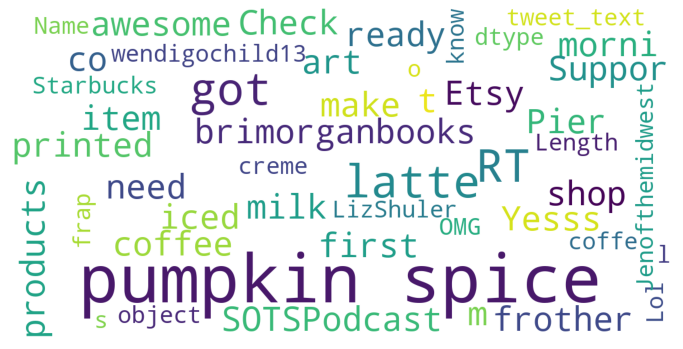

In [137]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(tweets['tweet_text'])

In [138]:
import re

def remove_stopwords_from_tweets(tweet):
    updated_tweet = tweet
    updated_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    updated_tweet = " ".join(word for word in updated_tweet.split() if word not in (stopword))
    return updated_tweet

In [139]:
tweets['updated_tweet'] = tweets['tweet_text'].apply(lambda x: remove_stopwords_from_tweets(x.lower()))
tweets.head()

tweet_id            author_id  \
0  1563558331608100864   967075191842099200   
1  1563558255502053376  1269673234552758276   
2  1563558116423188480             94892479   
3  1563558033669509122  1096866679013982210   
4  1563557995677569024   746878617397899264   

                                          tweet_text  like_count  quote_count  \
0  Check out this item in my Etsy shop https://t....           0            0   
1  i need to get a milk frother so i can make my ...           0            0   
2  Having my first pumpkin spice latte this morni...           0            0   
3  @brimorganbooks Yesss! We got pumpkin spice co...           0            0   
4  Got my pumpkin spice iced coffee I‚Äôm ready to ...           0            0   

   reply_count  retweet_count place       date     RT  Reply  \
0            0              0       2022-08-27  False  False   
1            0              0  None 2022-08-27  False  False   
2            0              0  None 2022-08-27  False  False   
3            0              0  None 2022-08-27  False   True   
4            0              0  None 2022-08-27  False  False   

                                       updated_tweet  
0                               check item etsy shop  
1  need get milk frother make pumpkin spice cold ...  
2                  first pumpkin spice latte morning  
3            yesss got pumpkin spice cookies grocery  
4      got pumpkin spice iced coffee ready start day

In [140]:
from textblob import TextBlob

tweets['polarity'] = tweets['updated_tweet'].apply(lambda x: TextBlob(x).sentiment[0])
tweets.loc[tweets['polarity'] < 0]

tweet_id            author_id  \
1     1563558255502053376  1269673234552758276   
9     1563557669755326464              8771022   
14    1563557149330251777  1548518234504273922   
17    1563557042299645953             79327509   
22    1563556599553110020   861336442542276609   
...                   ...                  ...   
8953  1565391531321827332  1410855213112700931   
8954  1565391530541580289            131671518   
8958  1565391509267968000   921231963121262594   
8961  1565391463667879936  1333549950299373568   
8962  1565391454251454465            488162370   

                                             tweet_text  like_count  \
1     i need to get a milk frother so i can make my ...           0   
9     @IsraelG18676630 You‚Äôre in! We‚Äôll make sure yo...           0   
14    Pumpkin Spice makes my nipples hard! \n\n#sexy...           1   
17    I have no money but pumpkin spice cold brew is...           0   
22    RT @stanzipotenza: Now that we‚Äôre entering fal...           0   
...                                                 ...         ...   
8953  I could not edit this @Twitter \n             ...           1   
8954  RT @SOTSPodcast: Pumpkin Spice lattes and Pier...           0   
8958  RT @SOTSPodcast: Pumpkin Spice lattes and Pier...           0   
8961  @Jenofthemidwest I know there‚Äôs a creme frap o...           1   
8962  RT @LizShuler: OMG! Starbucks‚Äô pumpkin spice l...           0   

      quote_count  reply_count  retweet_count place       date     RT  Reply  \
1               0            0              0  None 2022-08-27  False  False   
9               0            0              0  None 2022-08-27  False   True   
14              0            0              0  None 2022-08-27  False  False   
17              0            0              0  None 2022-08-27  False  False   
22              0            0            157  None 2022-08-27   True  False   
...           ...          ...            ...   ...        ...    ...    ...   
8953            0            0              0  None 2022-09-01  False  False   
8954            0            0            684       2022-09-01   True  False   
8958            0            0            684  None 2022-09-01   True  False   
8961            0            1              0  None 2022-09-01  False   True   
8962            0            0            234       2022-09-01   True  False   

                                          updated_tweet  polarity  
1     need get milk frother make pumpkin spice cold ... -0.600000  
9     make sure miss 3 medium pumpkin cream cold bre... -0.050000  
14    pumpkin spice makes nipples hard sexysaturday ... -0.291667  
17                   money pumpkin spice cold brew back -0.300000  
22    rt entering fall territory one cares anti pump... -0.300000  
...                                                 ...       ...  
8953  could edit pumpkin spice latte pizza trying li... -0.800000  
8954  rt pumpkin spice lattes pierce veil back big w... -0.266667  
8958  rt pumpkin spice lattes pierce veil back big w... -0.266667  
8961  know creme frap option without coffee occasion... -0.078571  
8962  rt omg starbucks pumpkin spice latte returned ... -0.500000  

[1202 rows x 13 columns]

In [141]:
# our negative sentiment doesn't appear totally accurate...
tweets.loc[tweets['polarity'] == 0]

tweet_id            author_id  \
0     1563558331608100864   967075191842099200   
3     1563558033669509122  1096866679013982210   
6     1563557799228948480             94270683   
8     1563557674394210304  1472635069403594752   
10    1563557473604096009   873287203928944640   
...                   ...                  ...   
8949  1565391545120989187  1315410706049630208   
8950  1565391541958590465           1092201402   
8951  1565391537789444096  1513905618561736704   
8952  1565391535214133250            121291606   
8956  1565391524728344584  1166933149902876673   

                                             tweet_text  like_count  \
0     Check out this item in my Etsy shop https://t....           0   
3     @brimorganbooks Yesss! We got pumpkin spice co...           0   
6     i‚Äôve acquired a pumpkin spice https://t.co/HE7...           2   
8     @BigToofedBlonde Was a whiff of pumpkin spice?...           0   
10    @Starbucks so when can I get my Pumpkin Spice ...           0   
...                                                 ...         ...   
8949  @souporexic i wanna omad the pumpkin spice lat...           0   
8950  Note: no pumpkin spice in this pic. ‚ÄòNough sai...           3   
8951    pumpkin spice season... https://t.co/rsuxXRKR27           0   
8952  üéÉ‚òïÔ∏èüçÇ It's officially pumpkin spice season! üçÇ‚òïÔ∏è...          10   
8956  Back in my Pop era‚Ä¶ craving a pumpkin spice la...           0   

      quote_count  reply_count  retweet_count place       date     RT  Reply  \
0               0            0              0       2022-08-27  False  False   
3               0            0              0  None 2022-08-27  False   True   
6               0            1              0  None 2022-08-27  False  False   
8               0            0              0  None 2022-08-27  False   True   
10              0            0              0       2022-08-27  False   True   
...           ...          ...            ...   ...        ...    ...    ...   
8949            0            0              0  None 2022-09-01  False   True   
8950            0            0              1       2022-09-01  False  False   
8951            1            0              0  None 2022-09-01  False  False   
8952            0            0              3  None 2022-09-01  False  False   
8956            0            0              0  None 2022-09-01  False  False   

                                      updated_tweet  polarity  
0                              check item etsy shop       0.0  
3           yesss got pumpkin spice cookies grocery       0.0  
6                            acquired pumpkin spice       0.0  
8                               whiff pumpkin spice       0.0  
10                          get pumpkin spice latte       0.0  
...                                             ...       ...  
8949                 wanna omad pumpkin spice latte       0.0  
8950              note pumpkin spice pic nough said       0.0  
8951                           pumpkin spice season       0.0  
8952                officially pumpkin spice season       0.0  
8956  back pop era craving pumpkin spice latte iced       0.0  

[4815 rows x 13 columns]

In [142]:
tweets['sentiment'] = tweets['polarity'].apply(lambda x: 'positive' if x > 0 else('negative' if x<0 else 'neutral'))
tweets.head()

tweet_id            author_id  \
0  1563558331608100864   967075191842099200   
1  1563558255502053376  1269673234552758276   
2  1563558116423188480             94892479   
3  1563558033669509122  1096866679013982210   
4  1563557995677569024   746878617397899264   

                                          tweet_text  like_count  quote_count  \
0  Check out this item in my Etsy shop https://t....           0            0   
1  i need to get a milk frother so i can make my ...           0            0   
2  Having my first pumpkin spice latte this morni...           0            0   
3  @brimorganbooks Yesss! We got pumpkin spice co...           0            0   
4  Got my pumpkin spice iced coffee I‚Äôm ready to ...           0            0   

   reply_count  retweet_count place       date     RT  Reply  \
0            0              0       2022-08-27  False  False   
1            0              0  None 2022-08-27  False  False   
2            0              0  None 2022-08-27  False  False   
3            0              0  None 2022-08-27  False   True   
4            0              0  None 2022-08-27  False  False   

                                       updated_tweet  polarity sentiment  
0                               check item etsy shop      0.00   neutral  
1  need get milk frother make pumpkin spice cold ...     -0.60  negative  
2                  first pumpkin spice latte morning      0.25  positive  
3            yesss got pumpkin spice cookies grocery      0.00   neutral  
4      got pumpkin spice iced coffee ready start day      0.20  positive

In [143]:
tweet_sentiment = tweets.groupby(tweets['sentiment'])

In [144]:
tweets.loc[tweets['sentiment']=='neutral']

tweet_id            author_id  \
0     1563558331608100864   967075191842099200   
3     1563558033669509122  1096866679013982210   
6     1563557799228948480             94270683   
8     1563557674394210304  1472635069403594752   
10    1563557473604096009   873287203928944640   
...                   ...                  ...   
8949  1565391545120989187  1315410706049630208   
8950  1565391541958590465           1092201402   
8951  1565391537789444096  1513905618561736704   
8952  1565391535214133250            121291606   
8956  1565391524728344584  1166933149902876673   

                                             tweet_text  like_count  \
0     Check out this item in my Etsy shop https://t....           0   
3     @brimorganbooks Yesss! We got pumpkin spice co...           0   
6     i‚Äôve acquired a pumpkin spice https://t.co/HE7...           2   
8     @BigToofedBlonde Was a whiff of pumpkin spice?...           0   
10    @Starbucks so when can I get my Pumpkin Spice ...           0   
...                                                 ...         ...   
8949  @souporexic i wanna omad the pumpkin spice lat...           0   
8950  Note: no pumpkin spice in this pic. ‚ÄòNough sai...           3   
8951    pumpkin spice season... https://t.co/rsuxXRKR27           0   
8952  üéÉ‚òïÔ∏èüçÇ It's officially pumpkin spice season! üçÇ‚òïÔ∏è...          10   
8956  Back in my Pop era‚Ä¶ craving a pumpkin spice la...           0   

      quote_count  reply_count  retweet_count place       date     RT  Reply  \
0               0            0              0       2022-08-27  False  False   
3               0            0              0  None 2022-08-27  False   True   
6               0            1              0  None 2022-08-27  False  False   
8               0            0              0  None 2022-08-27  False   True   
10              0            0              0       2022-08-27  False   True   
...           ...          ...            ...   ...        ...    ...    ...   
8949            0            0              0  None 2022-09-01  False   True   
8950            0            0              1       2022-09-01  False  False   
8951            1            0              0  None 2022-09-01  False  False   
8952            0            0              3  None 2022-09-01  False  False   
8956            0            0              0  None 2022-09-01  False  False   

                                      updated_tweet  polarity sentiment  
0                              check item etsy shop       0.0   neutral  
3           yesss got pumpkin spice cookies grocery       0.0   neutral  
6                            acquired pumpkin spice       0.0   neutral  
8                               whiff pumpkin spice       0.0   neutral  
10                          get pumpkin spice latte       0.0   neutral  
...                                             ...       ...       ...  
8949                 wanna omad pumpkin spice latte       0.0   neutral  
8950              note pumpkin spice pic nough said       0.0   neutral  
8951                           pumpkin spice season       0.0   neutral  
8952                officially pumpkin spice season       0.0   neutral  
8956  back pop era craving pumpkin spice latte iced       0.0   neutral  

[4815 rows x 14 columns]

In [145]:
tweet_sentiment.size()

sentiment
negative    1202
neutral     4815
positive    2946
dtype: int64

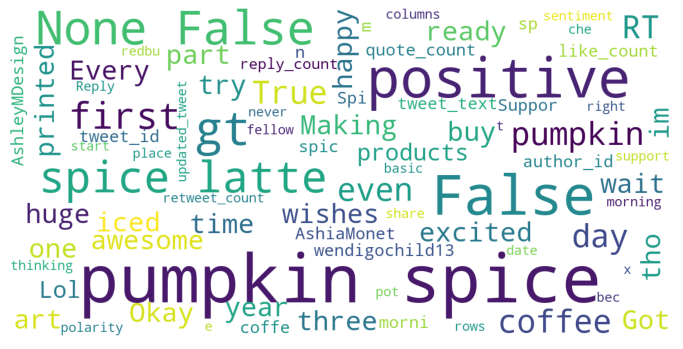

In [146]:
# positive sentiment word cloud

show_wordcloud(tweets.loc[tweets['sentiment'] == 'positive'])

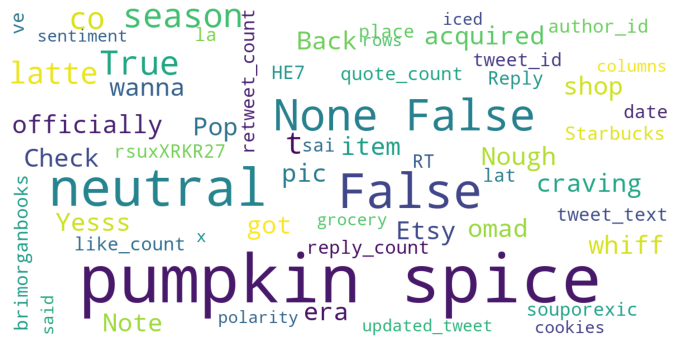

In [147]:
# neutral sentiment word cloud

show_wordcloud(tweets.loc[tweets['sentiment'] == 'neutral'])

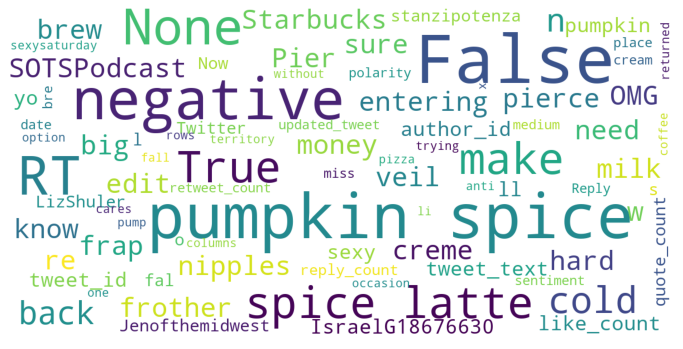

In [148]:
# negative sentiment word cloud

show_wordcloud(tweets.loc[tweets['sentiment'] == 'negative'])

In [149]:
tweets.loc[tweets['tweet_text'].str.contains("starbucks")].describe()

like_count  quote_count  reply_count  retweet_count    polarity
count  246.000000   246.000000   246.000000     246.000000  246.000000
mean     0.317073     0.008130     0.081301      61.987805    0.078491
std      1.991070     0.127515     0.273854     120.743800    0.234340
min      0.000000     0.000000     0.000000       0.000000   -0.800000
25%      0.000000     0.000000     0.000000       0.000000    0.000000
50%      0.000000     0.000000     0.000000       0.000000    0.000000
75%      0.000000     0.000000     0.000000      54.250000    0.112321
max     30.000000     2.000000     1.000000     487.000000    1.000000